Running Bot 1 with q=0.00, trial=1
The bot is placed in position: (30, 6), button position is: (9, 9)
Time step: 0
Time step: 1
Time step: 2
Time step: 3
Time step: 4
Time step: 5
Time step: 6
Time step: 7
Time step: 8
Time step: 9
Time step: 10
Time step: 11
Time step: 12
Time step: 13
Time step: 14
Time step: 15
Time step: 16
Time step: 17
Time step: 18
Time step: 19
Time step: 20
Time step: 21
Time step: 22
Time step: 23
Time step: 24
Time step: 25
Time step: 26
The bot has reached the button.
Running Bot 2 with q=0.00, trial=1
The bot is placed in position: (30, 6), button position is: (9, 9)
Time step: 0
Time step: 1
Time step: 2
Time step: 3
Time step: 4
Time step: 5
Time step: 6
Time step: 7
Time step: 8
Time step: 9
Time step: 10
Time step: 11
Time step: 12
Time step: 13
Time step: 14
Time step: 15
Time step: 16
Time step: 17
Time step: 18
Time step: 19
Time step: 20
Time step: 21
Time step: 22
Time step: 23
Time step: 24
Time step: 25
Time step: 26
The bot has reached the butt

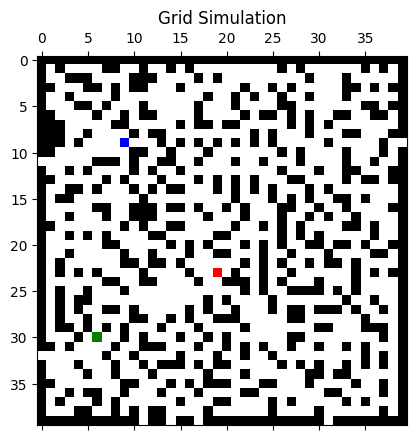

Running Bot 1 with q=0.00, trial=2
The bot is placed in position: (8, 11), button position is: (2, 24)
Time step: 0
Time step: 1
Time step: 2
Time step: 3
Time step: 4
Time step: 5
Time step: 6
Time step: 7
Time step: 8
Time step: 9
Time step: 10
Time step: 11
Time step: 12
Time step: 13
Time step: 14
Time step: 15
Time step: 16
Time step: 17
Time step: 18
Time step: 19
Time step: 20
Time step: 21
Time step: 22
Time step: 23
The bot has reached the button.
Running Bot 2 with q=0.00, trial=2
The bot is placed in position: (8, 11), button position is: (2, 24)
Time step: 0
Time step: 1
Time step: 2
Time step: 3
Time step: 4
Time step: 5
Time step: 6
Time step: 7
Time step: 8
Time step: 9
Time step: 10
Time step: 11
Time step: 12
Time step: 13
Time step: 14
Time step: 15
Time step: 16
Time step: 17
Time step: 18
Time step: 19
Time step: 20
Time step: 21
Time step: 22
Time step: 23
The bot has reached the button.
Running Bot 3 with q=0.00, trial=2
The bot is placed in position: (8, 11), but

/Users/drcrocs22/Developer/Rutgers Projects/Intro To AI/Project_1_Final/grid_bot_project/lib/python3.12/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


Running Bot 3 with q=0.00, trial=3
The bot is placed in position: (16, 37), button position is: (31, 22)
Time step: 0
Attempting to find path avoiding adjacent fire cells.
Current cell: (31, 22), Parent: (30, 22)
Current cell: (30, 22), Parent: (29, 22)
Current cell: (29, 22), Parent: (29, 23)
Current cell: (29, 23), Parent: (29, 24)
Current cell: (29, 24), Parent: (29, 25)
Current cell: (29, 25), Parent: (28, 25)
Current cell: (28, 25), Parent: (27, 25)
Current cell: (27, 25), Parent: (26, 25)
Current cell: (26, 25), Parent: (26, 26)
Current cell: (26, 26), Parent: (25, 26)
Current cell: (25, 26), Parent: (24, 26)
Current cell: (24, 26), Parent: (23, 26)
Current cell: (23, 26), Parent: (22, 26)
Current cell: (22, 26), Parent: (21, 26)
Current cell: (21, 26), Parent: (21, 27)
Current cell: (21, 27), Parent: (21, 28)
Current cell: (21, 28), Parent: (21, 29)
Current cell: (21, 29), Parent: (21, 30)
Current cell: (21, 30), Parent: (21, 31)
Current cell: (21, 31), Parent: (22, 31)
Current 

KeyboardInterrupt: 

In [1]:
import sys
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from env_utils import *
from Bot import *

n = 40
num_trials = 50
q_values = np.arange(0, 1.05, 0.05)  # Range of q values from 0 to 1 in intervals of 0.05

# dictionary to store all the results
results = {
    'Bot 1': {'success': [], 'failures': [], 'steps': [], 'possible_success': []},
    'Bot 2': {'success': [], 'failures': [], 'steps': [], 'possible_success': []},
    'Bot 3': {'success': [], 'failures': [], 'steps': [], 'possible_success': []},
    'Bot 4': {'success': [], 'failures': [], 'steps': [], 'possible_success': []},
}

# bot functions to iterate over for the simulations
bot_functions = {
    'Bot 1': time_lapse_fn_bot_1,
    'Bot 2': time_lapse_fn_bot2,
    'Bot 3': time_lapse_fn_bot3,
    'Bot 4': time_lapse_fn_bot4_prob_safe,
}

for q in q_values:
    for trial in range(num_trials):
        # generating a particular random seed in each simulation for consistency across bots
        seed_value = random.randrange(1, 100000)
        random.seed(seed_value)
        np.random.seed(seed_value)

        # Initialize the grid and element positions
        grid = grid_init(n)
        button_pos = button_init(grid, n, 3)
        bot_pos = bot_init(grid, n, 4)
        fire_init = fire_init_fn(grid, n, 2)

        for bot_type, bot_function in bot_functions.items():
            print(f"Running {bot_type} with q={q:.2f}, trial={trial+1}")

            # environment for each bot
            current_grid = grid.copy()
            frames = []

            # bot function runs and collects log_data
            log_data = bot_function(current_grid, q, n, frames, bot_pos, button_pos, fire_init, seed_value, trial)

            # Collecting results
            if log_data is not None:
                if log_data['result'] == 'Success':
                    results[bot_type]['success'].append((q, log_data['steps']))
                else:
                    results[bot_type]['failures'].append((q, log_data['steps']))
                results[bot_type]['steps'].append((q, log_data['steps']))
                if log_data['result'] != 'Bot caught fire' and log_data['result'] != 'Button caught fire':
                    results[bot_type]['possible_success'].append((q, log_data['steps']))
            else:
                print(f"{bot_type} returned None for q={q:.2f}, trial={trial+1}")

# Calculating and printing the percentage accuracy of each bot (across all simulations)
for bot_type in bot_functions.keys():
    total_trials = len(results[bot_type]['success']) + len(results[bot_type]['failures'])
    if total_trials > 0:
        accuracy = (len(results[bot_type]['success']) / total_trials) * 100
        print(f"{bot_type} Accuracy: {accuracy:.2f}%")
    else:
        print(f"{bot_type} Accuracy: No trials conducted")

# Plot the results
plt.figure(figsize=(15, 10))

# Success rate 
plt.subplot(3, 1, 1)
for bot_type in bot_functions.keys():
    q_success_rate = [len([s for s in results[bot_type]['success'] if s[0] == q]) / num_trials for q in q_values]
    plt.plot(q_values, q_success_rate, label=f'{bot_type} Success Rate')
plt.xlabel('q Value (Fire Spread Probability)')
plt.ylabel('Success Rate')
plt.title('Success Rate vs q Value for Different Bots')
plt.legend()
plt.grid(True)

# Average steps taken
plt.subplot(3, 1, 2)
for bot_type in bot_functions.keys():
    q_avg_steps = []
    for q in q_values:
        steps = [s[1] for s in results[bot_type]['steps'] if s[0] == q]
        avg_steps = np.mean(steps) if steps else 0
        q_avg_steps.append(avg_steps)
    plt.plot(q_values, q_avg_steps, label=f'{bot_type} Average Steps')
plt.xlabel('q Value (Fire Spread Probability)')
plt.ylabel('Average Steps Taken')
plt.title('Average Steps vs q Value for Different Bots')
plt.legend()
plt.grid(True)

# Success rate for possible successes 
plt.subplot(3, 1, 3)
for bot_type in bot_functions.keys():
    q_possible_success_rate = [
        len([s for s in results[bot_type]['success'] if s[0] == q]) /
        len([s for s in results[bot_type]['possible_success'] if s[0] == q])
        if len([s for s in results[bot_type]['possible_success'] if s[0] == q]) > 0 else 0
        for q in q_values
    ]
    plt.plot(q_values, q_possible_success_rate, label=f'{bot_type} Possible Success Rate')
plt.xlabel('q Value (Fire Spread Probability)')
plt.ylabel('Success Rate (Out of Possible Successes)')
plt.title('Success Rate vs q Value (Out of Possible Successes) for Different Bots')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()